In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.interpolate import interp1d


#parameters that can be changed
pulsewidth=330e-15
sampling_rate=240/pulsewidth
lambda0=1030e-9
t=1/sampling_rate*np.arange(-800,800)
wavelength_vec_limits=(lambda0-200e-9, lambda0+200e-9)

c=299792458.0
omega0=2*np.pi*c/lambda0 #note: frequency plot is centered around central frequency, not angular frequency

AofT=np.exp(-1.386*(t/pulsewidth)**2)
EofT=AofT*np.exp(1j*omega0*t)
phase_td = -1*np.arctan2(np.imag(EofT),np.real(EofT))
phase_td = np.unwrap(phasetd)
spectrum_td = (np.abs(EofT))**2

EofF=np.fft.fft(EofT)
freq_vector = np.fft.fftfreq(n=(EofF.size), d=1/sampling_rate)
phase_fd = -1*np.arctan2(np.imag(EofF),np.real(EofF))
phase_fd = np.unwrap(phasefd)
spectrum_fd = (np.abs(EofF))**2

wavelength_vector = np.linspace(wavelength_vec_limits[0],wavelength_vec_limits[1],num=len(freq_vector))
spectrum_wd_interp = interp1d(2*np.pi*freq_vector, spectrum_fd)
spectrum_wd = (2*np.pi*c/(wavelength_vector**2))*spectrum_wd_interp(2*np.pi*c/wavelength_vector)
phase_wd_interp = interp1d(2*np.pi*freq_vector, phase_fd)
phase_wd = phase_wd_interp(2*np.pi*c/wavelength_vector)

fig, plots = plt.subplots(3,2,figsize=(15,15))
plots[0,0].set_title("Time Domain Intensity")
plots[0,0].plot(t, spectrumtd)
plots[0,1].set_title("Time Domain Phase")
plots[0,1].plot(t, phasetd)
plots[1,0].set_title("Frequency Domain Spectrum")
plots[1,0].plot(np.fft.fftshift(freq_vector), spectrum_fd)
plots[1,1].set_title("Frequency Domain Phase")
plots[1,1].plot(np.fft.fftshift(freq_vector), phase_fd)
plots[2,0].set_title("Wavelength Domain Spectrum")
plots[2,0].plot(wavelength_vector, spectrum_wd)
plots[2,1].set_title("Wavelength Domain Phase")
plots[2,1].plot(wavelength_vector, phase_wd)

NameError: name 'phasetd' is not defined

In [84]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.interpolate import interp1d

#parameters that can be changed
pulsewidth=330e-15
sampling_rate=300/pulsewidth
lambda0=1030e-9
t=1/sampling_rate*np.arange(-800,800)
wavelength_vec_limits=(lambda0-200e-9, lambda0+200e-9)

c=299792458.0
omega0=2*np.pi*c/lambda0 #note: frequency plot is centered around central frequency, not angular frequency

AofT=np.exp(-1.386*(t/pulsewidth)**2)
EofT=AofT*np.exp(1j*omega0*t)
phase_td = -1*np.angle(EofT)
phase_td = np.unwrap(phase_td)
spectrum_td = (np.abs(EofT))**2

/Users/jackhirschman/anaconda3/envs/main_env/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


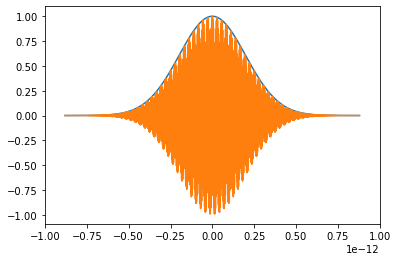

1600


In [85]:
plt.plot(t,AofT)
plt.plot(t, EofT)
plt.xlim(-1e-12,1e-12)
plt.show()
print(EofT.shape[0])

In [111]:
EofT_ft = np.fft.fft(EofT)
Int_ft = ((np.abs(EofT_ft)**2))
phase_ft = ((np.angle(EofT_ft)))
EofT_ft = (np.fft.fft(EofT))         
freq = (np.fft.fftfreq(n=EofT.shape[0],d=1/sampling_rate))

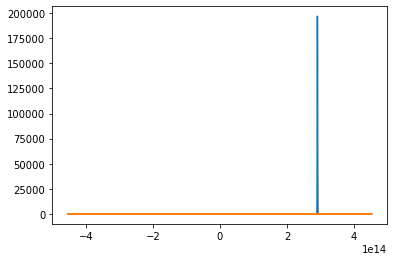

In [113]:
plt.plot(freq, Int_ft)
plt.plot(freq,phase_ft)
#plt.xlim(-2e14, 2e14)

In [72]:
omega0/(2*np.pi)

291060638834951.4

In [79]:
sampling_rate

727272727272727.2

/Users/jackhirschman/anaconda3/envs/main_env/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-2e-14, 2e-14)

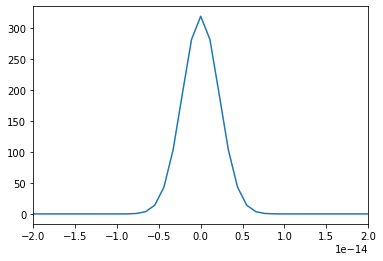

In [96]:
plt.plot(t,np.fft.fftshift(np.fft.fft((np.fft.ifftshift(np.abs(EofT)**2)))))
plt.xlim(-.2e-13,.2e-13)